In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
file = pd.read_csv("/content/drive/MyDrive/AI lab/train.csv")
x = file.drop(columns=['label'])
y = file['label']
x

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=40)

In [ ]:
network = Sequential()
network.add(Dense(128, input_dim=784, activation='relu'))
network.add(Dense(500, activation='relu'))
network.add(Dense(10, activation='softmax'))
network.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 500)               64500     
                                                                 
 dense_2 (Dense)             (None, 10)                5010      
                                                                 
Total params: 169990 (664.02 KB)
Trainable params: 169990 (664.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = network.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
657/657 [==============================] - 5s 7ms/step - loss: 0.3186 - accuracy: 0.9061 - val_loss: 0.2007 - val_accuracy: 0.9427
Epoch 2/10
657/657 [==============================] - 5s 8ms/step - loss: 0.1259 - accuracy: 0.9614 - val_loss: 0.1636 - val_accuracy: 0.9517
Epoch 3/10
657/657 [==============================] - 3s 5ms/step - loss: 0.0818 - accuracy: 0.9749 - val_loss: 0.1932 - val_accuracy: 0.9467
Epoch 4/10
657/657 [==============================] - 3s 4ms/step - loss: 0.0636 - accuracy: 0.9804 - val_loss: 0.1720 - val_accuracy: 0.9585
Epoch 5/10
657/657 [==============================] - 4s 6ms/step - loss: 0.0519 - accuracy: 0.9838 - val_loss: 0.2029 - val_accuracy: 0.9543
Epoch 6/10
657/657 [==============================] - 3s 5ms/step - loss: 0.0425 - accuracy: 0.9867 - val_loss: 0.1990 - val_accuracy: 0.9583
Epoch 7/10
657/657 [==============================] - 3s 5ms/step - loss: 0.0239 - accuracy: 0.9919 - val_loss: 0.1915 - val_accuracy: 0.9606
Epoch 

In [ ]:
test_loss, test_accuracy = network.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

657/657 [==============================] - 1s 2ms/step - loss: 0.2430 - accuracy: 0.9595
Test Loss: 0.2430
Test Accuracy: 0.9595


In [ ]:
y_pred = network.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

657/657 [==============================] - 1s 1ms/step


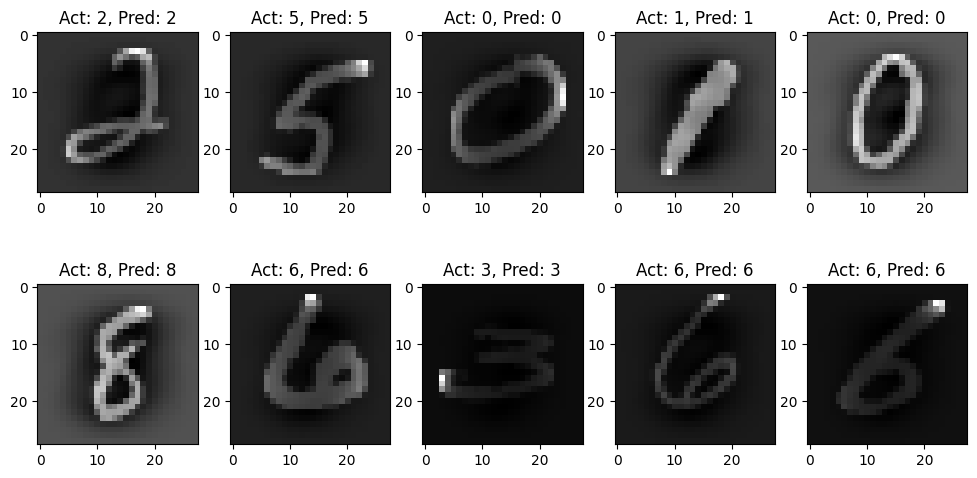

In [ ]:
num_images_to_visualize = 10
sample_indices = np.random.choice(range(len(x_test)), num_images_to_visualize, replace=False)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(sample_indices):
    actual_label = y_test.iloc[idx]
    predicted_label = y_pred_labels[idx]
    image_pixels = x_test[idx].reshape(28, 28)
    plt.subplot(2, 5, i + 1)
    plt.imshow(image_pixels, cmap='gray')
    plt.title(f"Act: {actual_label}, Pred: {predicted_label}")
plt.show()